<a href="https://colab.research.google.com/github/zihongchen/busi488_/blob/main/TeamAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Assignment 2

##Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.model_selection import GridSearchCV
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/BUSICOMP488-Spring2021-Assignment2-Section003-TeamBeta
!ls  # special shell command to view the files in the home directory of the notebook environment

/content/gdrive/.shortcut-targets-by-id/1RoREV8aXjMx-b1IuWBsqY_Qkwb69J9sA/BUSICOMP488-Spring2021-Assignment2-Section003-TeamBeta
 488_2021_Class09_20210222.ipynb   LCDataDictionary.xlsx
 accepted_2007_to_2018Q4.csv	   rejected_2007_to_2018Q4.csv
'Assignment2 Overview.gdoc'	   TeamAssignment2.ipynb


In [ ]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',sep=',', header = None, nrows=100000)  # nrows imports only segment of data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6,7,13,19,24,25,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,48,51,52,53,54,55,57,58,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,132,133,137,138,140,141,142,148,149,150) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean Data

#### Arranging the DataFrame

In [ ]:
# Change column names from numbers to variables

new_header = df.iloc[0] #grab the first row for the header    https://www.codegrepper.com/code-examples/python/make+first+row+column+names+in+pandas 
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723916800001,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.66,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Dropping Columns and Converting Data Types

In [ ]:
# At the time of investment, many variables won't be available to Dr. D -- how would 

# id, loan_amnt, funded_amnt, term, int_rate, grade, emp_length, home_ownership, annual_inc, 
# verification_status, issue_d, loan_status, purpose, dti, delinq_2yrs, earliest_cr_line, open_acc, pub_rec, fico_range_high, 
# fico_range_low, revol_bal, revol_util, total_pymnt, and recoveries

In [ ]:
# Too qualitative (could be encoded later) 
df.drop(['emp_title'], axis=1, inplace=True)
df.drop(['verification_status_joint'], axis=1, inplace=True)


# We don't have enough information about what a payment plan means (what kind of plan if on one)
df.drop(['pymnt_plan'], axis=1, inplace=True)

# The data is historical...
# Looking at the past 6 months or how many months since ___ isn't relevant for entire dataset. 
df.drop(['inq_last_6mths'], axis=1, inplace=True)
df.drop(['mths_since_last_delinq'], axis=1, inplace=True)
df.drop(['mths_since_last_record'], axis=1, inplace=True)
df.drop(['last_fico_range_high'], axis=1, inplace=True)
df.drop(['last_fico_range_low'], axis=1, inplace=True)
df.drop(['collections_12_mths_ex_med'], axis=1, inplace=True)
df.drop(['mths_since_last_major_derog'], axis=1, inplace=True)
df.drop(['open_acc_6m'], axis=1, inplace=True)
df.drop(['open_act_il'], axis=1, inplace=True)
df.drop(['open_il_12m'], axis=1, inplace=True)
df.drop(['open_il_24m'], axis=1, inplace=True)
df.drop(['mths_since_rcnt_il'], axis=1, inplace=True)
df.drop(['total_bal_il'], axis=1, inplace=True)
df.drop(['il_util'], axis=1, inplace=True)
df.drop(['open_rv_12m'], axis=1, inplace=True)
df.drop(['open_rv_24m'], axis=1, inplace=True)
df.drop(['max_bal_bc'], axis=1, inplace=True)
df.drop(['inq_last_12m'], axis=1, inplace=True)
df.drop(['acc_open_past_24mths'], axis=1, inplace=True)
df.drop(['avg_cur_bal'], axis=1, inplace=True)
df.drop(['chargeoff_within_12_mths'], axis=1, inplace=True)
df.drop(['mo_sin_old_il_acct'], axis=1, inplace=True)
df.drop(['mo_sin_old_rev_tl_op'], axis=1, inplace=True)
df.drop(['mo_sin_rcnt_rev_tl_op'], axis=1, inplace=True)
df.drop(['mo_sin_rcnt_tl'], axis=1, inplace=True)
df.drop(['mths_since_recent_bc'], axis=1, inplace=True)
df.drop(['mths_since_recent_bc_dlq'], axis=1, inplace=True)
df.drop(['mths_since_recent_inq'], axis=1, inplace=True)
df.drop(['mths_since_recent_revol_delinq'], axis=1, inplace=True)
df.drop(['num_tl_120dpd_2m'], axis=1, inplace=True)
df.drop(['num_tl_30dpd'], axis=1, inplace=True)
df.drop(['num_tl_90g_dpd_24m'], axis=1, inplace=True)
df.drop(['num_tl_op_past_12m'], axis=1, inplace=True)


# Data that develops during loan process 
# (You wouldn't know how much principal will be outstanding at different points when investing)
df.drop(['out_prncp'], axis=1, inplace=True)
df.drop(['out_prncp_inv'], axis=1, inplace=True)
df.drop(['total_rec_prncp'], axis=1, inplace=True)
df.drop(['last_pymnt_d'], axis=1, inplace=True)
df.drop(['last_pymnt_amnt'], axis=1, inplace=True)
df.drop(['next_pymnt_d'], axis=1, inplace=True)
df.drop(['last_credit_pull_d'], axis=1, inplace=True)
df.drop(['acc_now_delinq'], axis=1, inplace=True)


# Variables we don't understand / don't have enough info on
df.drop(['all_util'], axis=1, inplace=True)
df.drop(['total_rev_hi_lim'], axis=1, inplace=True)
df.drop(['bc_open_to_buy'], axis=1, inplace=True)
df.drop(['bc_util'], axis=1, inplace=True)
df.drop(['num_accts_ever_120_pd'], axis=1, inplace=True)
df.drop(['num_actv_bc_tl'], axis=1, inplace=True)
df.drop(['num_actv_rev_tl'], axis=1, inplace=True)
df.drop(['num_bc_sats'], axis=1, inplace=True)
df.drop(['num_bc_tl'], axis=1, inplace=True)
df.drop(['num_il_tl'], axis=1, inplace=True)
df.drop(['num_op_rev_tl'], axis=1, inplace=True)
df.drop(['num_rev_accts'], axis=1, inplace=True)
df.drop(['num_rev_tl_bal_gt_0'], axis=1, inplace=True)
df.drop(['num_sats'], axis=1, inplace=True)
df.drop(['percent_bc_gt_75'], axis=1, inplace=True)
df.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)
df.drop(['tax_liens'], axis=1, inplace=True)
df.drop(['tot_hi_cred_lim'], axis=1, inplace=True)
df.drop(['total_bal_ex_mort'], axis=1, inplace=True)
df.drop(['total_bc_limit'], axis=1, inplace=True)
df.drop(['total_il_high_credit_limit'], axis=1, inplace=True)
df.drop(['revol_bal_joint'], axis=1, inplace=True)

# Secondary applicant info
df.drop(['sec_app_fico_range_low'], axis=1, inplace=True)
df.drop(['sec_app_fico_range_high'], axis=1, inplace=True)
df.drop(['sec_app_earliest_cr_line'], axis=1, inplace=True)
df.drop(['sec_app_inq_last_6mths'], axis=1, inplace=True)
df.drop(['sec_app_mort_acc'], axis=1, inplace=True)
df.drop(['sec_app_open_acc'], axis=1, inplace=True)
df.drop(['sec_app_revol_util'], axis=1, inplace=True)
df.drop(['sec_app_open_act_il'], axis=1, inplace=True)
df.drop(['sec_app_num_rev_accts'], axis=1, inplace=True)
df.drop(['sec_app_chargeoff_within_12_mths'], axis=1, inplace=True)
df.drop(['sec_app_collections_12_mths_ex_med'], axis=1, inplace=True)
df.drop(['sec_app_mths_since_last_major_derog'], axis=1, inplace=True)

# Hardship
df.drop(['hardship_reason'], axis=1, inplace=True)
df.drop(['hardship_status'], axis=1, inplace=True)
df.drop(['deferral_term'], axis=1, inplace=True)
df.drop(['hardship_amount'], axis=1, inplace=True)
df.drop(['hardship_start_date'], axis=1, inplace=True)
df.drop(['hardship_end_date'], axis=1, inplace=True)
df.drop(['payment_plan_start_date'], axis=1, inplace=True)
df.drop(['hardship_length'], axis=1, inplace=True)
df.drop(['hardship_dpd'], axis=1, inplace=True)
df.drop(['hardship_payoff_balance_amount'], axis=1, inplace=True)
df.drop(['hardship_last_payment_amount'], axis=1, inplace=True)
df.drop(['disbursement_method'], axis=1, inplace=True)


df.drop(['debt_settlement_flag_date'], axis=1, inplace=True)
df.drop(['settlement_date'], axis=1, inplace=True)
df.drop(['settlement_term'], axis=1, inplace=True)


# Drop columns that are repetitive or are missing data significantly
df.drop(['member_id', 'url', 'desc', 'title', 'zip_code'], axis=1, inplace=True)

#drop 2 rows with NaN values in dti and revol_util column
df = df.dropna(subset=['dti'])
df = df.dropna(subset=['revol_util'])


#### Convert columns to usable data types

In [ ]:
# Change term to term in months
df['term'] = df['term'].str.slice(1,3)
df['term'] = df['term'].astype(float)
df = df.rename(columns={"term": "term_in_months"})

In [ ]:
# Convert column types to float
df['loan_amnt'] = df['loan_amnt'].astype(float)
df['funded_amnt'] = df['funded_amnt'].astype(float)
df['funded_amnt_inv'] = df['funded_amnt_inv'].astype(float)
df['int_rate'] = df['int_rate'].astype(float)
df['installment'] = df['installment'].astype(float)
df['annual_inc'] = df['annual_inc'].astype(float)
df['delinq_2yrs'] = df['delinq_2yrs'].astype(float)
df['open_acc'] = df['open_acc'].astype(float)
df['pub_rec'] = df['pub_rec'].astype(float)
df['revol_bal'] = df['revol_bal'].astype(float)
df['revol_util'] = df['revol_util'].astype(float)
df['total_acc'] = df['total_acc'].astype(float)
df['total_pymnt'] = df['total_pymnt'].astype(float)
df['total_pymnt_inv'] = df['total_pymnt_inv'].astype(float)
df['recoveries'] = df['recoveries'].astype(float)
df['annual_inc_joint'] = df['annual_inc_joint'].astype(float)
df['dti_joint'] = df['dti_joint'].astype(float)
df['tot_coll_amt'] = df['tot_coll_amt'].astype(float)
df['tot_cur_bal'] = df['tot_cur_bal'].astype(float)
df['inq_fi'] = df['inq_fi'].astype(float)
df['total_cu_tl'] = df['total_cu_tl'].astype(float)
df['delinq_amnt'] = df['delinq_amnt'].astype(float)
df['mort_acc'] = df['mort_acc'].astype(float)
df['pct_tl_nvr_dlq'] = df['pct_tl_nvr_dlq'].astype(float)
df['orig_projected_additional_accrued_interest'] = df['orig_projected_additional_accrued_interest'].astype(float)
df['settlement_amount'] = df['settlement_amount'].astype(float)
df['settlement_percentage'] = df['settlement_percentage'].astype(float)


df[['total_rec_int', "total_rec_late_fee",'collection_recovery_fee']] = df[['total_rec_int', "total_rec_late_fee",'collection_recovery_fee']].apply(pd.to_numeric)
df[['dti', "fico_range_low",'fico_range_high']] = df[['dti', "fico_range_low",'fico_range_high']].apply(pd.to_numeric)


# Convert to category
df['id'] = df['id'].astype('category')
df['grade'] = df['grade'].astype('category')
df['sub_grade'] = df['sub_grade'].astype('category')
df['home_ownership'] = df['home_ownership'].astype('category')
df['verification_status'] = df['verification_status'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')
df['purpose'] = df['purpose'].astype('category')
df['addr_state'] = df['addr_state'].astype('category')
df['initial_list_status'] = df['initial_list_status'].astype('category')
df['policy_code'] = df['policy_code'].astype('category')
df['application_type'] = df['application_type'].astype('category')
df['hardship_flag'] = df['hardship_flag'].astype('category')
df['hardship_type'] = df['hardship_type'].astype('category')
df['hardship_loan_status'] = df['hardship_loan_status'].astype('category')
df['debt_settlement_flag'] = df['debt_settlement_flag'].astype('category')
df['settlement_status'] = df['settlement_status'].astype('category')
df['emp_length'] = df['emp_length'].astype('category')


# Convert column types to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [ ]:
#fix numeric columns with NaN datatypes
#example; if NaN for joint income, set joint income value to single income
df['settlement_amount'] = df['settlement_amount'].fillna(0)
df['settlement_percentage'] = df['settlement_percentage'].fillna(0)
df['annual_inc_joint'].fillna(df['annual_inc'], inplace=True)
df['dti_joint'].fillna(df['dti'], inplace=True)
df['orig_projected_additional_accrued_interest'] = df['orig_projected_additional_accrued_interest'].fillna(0)

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,application_type,annual_inc_joint,dti_joint,tot_coll_amt,tot_cur_bal,inq_fi,total_cu_tl,delinq_amnt,mort_acc,pct_tl_nvr_dlq,hardship_flag,hardship_type,hardship_loan_status,orig_projected_additional_accrued_interest,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage
1,68407277,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,debt_consolidation,PA,5.91,0.0,2003-08-01,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,821.72,0.0,0.0,0.0,1.0,Individual,55000.0,5.91,722.0,144904.0,3.0,1.0,0.0,1.0,76.9,N,NaN,NaN,0.0,N,NaN,0.0,0.0
2,68355089,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,small_business,SD,16.06,1.0,1999-12-01,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,979.66,0.0,0.0,0.0,1.0,Individual,65000.0,16.06,0.0,204396.0,0.0,0.0,0.0,4.0,97.4,N,NaN,NaN,0.0,N,NaN,0.0,0.0
3,68341763,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,2015-12-01,Fully Paid,home_improvement,IL,10.78,0.0,2000-08-01,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,2705.92,0.0,0.0,0.0,1.0,Joint App,71000.0,13.85,0.0,189699.0,2.0,5.0,0.0,5.0,100.0,N,NaN,NaN,0.0,N,NaN,0.0,0.0
4,66310712,35000.0,35000.0,35000.0,60.0,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,2015-12-01,Current,debt_consolidation,NJ,17.06,0.0,2008-09-01,785.0,789.0,13.0,0.0,7802.0,11.6,17.0,w,31464.010000,31464.01,12361.66,0.0,0.0,0.0,1.0,Individual,110000.0,17.06,0.0,301500.0,0.0,1.0,0.0,1.0,100.0,N,NaN,NaN,0.0,N,NaN,0.0,0.0
5,68476807,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,major_purchase,PA,25.37,1.0,1998-06-01,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,1340.50,0.0,0.0,0.0,1.0,Individual,104433.0,25.37,0.0,331730.0,2.0,1.0,0.0,6.0,96.6,N,NaN,NaN,0.0,N,NaN,0.0,0.0


In [ ]:
df.dtypes

0
id                                                  category
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term_in_months                                       float64
int_rate                                             float64
installment                                          float64
grade                                               category
sub_grade                                           category
emp_length                                          category
home_ownership                                      category
annual_inc                                           float64
verification_status                                 category
issue_d                                       datetime64[ns]
loan_status                                         category
purpose                                             category
addr_state            

#### Removing Irrelevant Data

In [ ]:
# The data contains a significant number of "current" loans. 
# Remove the loans with a "current" status because they are underway and can't be used to make assumptions. 
# (doesn't provide target for supervised learning)
df['loan_status'].value_counts()

Fully Paid            70259
Charged Off           17594
Current               11400
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: loan_status, dtype: int64

In [ ]:
indexes = df[ df['loan_status'] == 'Current' ].index
df.drop(indexes , inplace=True)
df['loan_status'].value_counts()

Fully Paid            70259
Charged Off           17594
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Current                   0
Name: loan_status, dtype: int64

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,application_type,annual_inc_joint,dti_joint,tot_coll_amt,tot_cur_bal,inq_fi,total_cu_tl,delinq_amnt,mort_acc,pct_tl_nvr_dlq,hardship_flag,hardship_type,hardship_loan_status,orig_projected_additional_accrued_interest,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage
1,68407277,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,debt_consolidation,PA,5.91,0.0,2003-08-01,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,821.72,0.0,0.0,0.0,1.0,Individual,55000.0,5.91,722.0,144904.0,3.0,1.0,0.0,1.0,76.9,N,NaN,NaN,0.0,N,NaN,0.0,0.0
2,68355089,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,small_business,SD,16.06,1.0,1999-12-01,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,979.66,0.0,0.0,0.0,1.0,Individual,65000.0,16.06,0.0,204396.0,0.0,0.0,0.0,4.0,97.4,N,NaN,NaN,0.0,N,NaN,0.0,0.0
3,68341763,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,2015-12-01,Fully Paid,home_improvement,IL,10.78,0.0,2000-08-01,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,2705.92,0.0,0.0,0.0,1.0,Joint App,71000.0,13.85,0.0,189699.0,2.0,5.0,0.0,5.0,100.0,N,NaN,NaN,0.0,N,NaN,0.0,0.0
5,68476807,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,major_purchase,PA,25.37,1.0,1998-06-01,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,1340.50,0.0,0.0,0.0,1.0,Individual,104433.0,25.37,0.0,331730.0,2.0,1.0,0.0,6.0,96.6,N,NaN,NaN,0.0,N,NaN,0.0,0.0
6,68426831,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,2015-12-01,Fully Paid,debt_consolidation,GA,10.20,0.0,1987-10-01,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,w,13708.948530,13708.95,1758.95,0.0,0.0,0.0,1.0,Individual,34000.0,10.20,0.0,12798.0,0.0,0.0,0.0,0.0,100.0,N,NaN,NaN,0.0,N,NaN,0.0,0.0


In [ ]:
df_numerical = df.copy()

df_numerical['id'] = df_numerical['id'].cat.codes
df_numerical['grade'] = df_numerical['grade'].cat.codes
df_numerical['sub_grade'] = df_numerical['sub_grade'].cat.codes
df_numerical['home_ownership'] = df_numerical['home_ownership'].cat.codes
df_numerical['verification_status'] = df_numerical['verification_status'].cat.codes
df_numerical['loan_status'] = df_numerical['loan_status'].cat.codes
df_numerical['purpose'] = df_numerical['purpose'].cat.codes
df_numerical['addr_state'] = df_numerical['addr_state'].cat.codes
df_numerical['initial_list_status'] = df_numerical['initial_list_status'].cat.codes
df_numerical['policy_code'] = df_numerical['policy_code'].cat.codes
df_numerical['application_type'] = df_numerical['application_type'].cat.codes
df_numerical['hardship_flag'] = df_numerical['hardship_flag'].cat.codes
df_numerical['hardship_type'] = df_numerical['hardship_type'].cat.codes
df_numerical['hardship_loan_status'] = df_numerical['hardship_loan_status'].cat.codes
df_numerical['debt_settlement_flag'] = df_numerical['debt_settlement_flag'].cat.codes
df_numerical['settlement_status'] = df_numerical['settlement_status'].cat.codes
df_numerical['emp_length'] = df_numerical['emp_length'].cat.codes

df_numerical['issue_d'] = pd.to_numeric(df_numerical['issue_d'])
df_numerical['earliest_cr_line'] = pd.to_numeric(df_numerical['earliest_cr_line'])

## Work

In [ ]:
df['loan_status'].value_counts()

Fully Paid            70259
Charged Off           17594
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Current                   0
Name: loan_status, dtype: int64

**Fully paid**: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment

**Charged Off**: Loan for which there is no longer a reasonable expectation of further payments. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance.

**Current**: Loan is up to date on all outstanding payments. 

**Late (16-30)**: Loan has not been current for 16 to 30 days.

**Late (31-120)**: Loan has not been current for 31 to 120 days

**In Grace Period**: Loan is past due but within the 15-day grace period.

**Default**: Loan has not been current for an extended period of time.

https://help.lendingclub.com/hc/en-us/articles/215488038 

In [ ]:
complete = df_numerical.loc[(df_numerical["loan_status"] == 3) | (df_numerical["loan_status"] == 0)]
# complete['loan_status'].head()
# Create arrays for the features and the response variable
import numpy as np
y = complete['loan_status']
# Drop the feature variables and any variables associated with collections on the loan.
X = complete.drop(['loan_status','total_rec_int','total_rec_late_fee','collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'recoveries'], axis=1).select_dtypes(include=np.number).dropna(axis='columns').values
print("Response Variable: ",y.shape)
print("Feature Variables: ",X.shape)

repmap={3: 1, 0: 0}
y.replace(repmap, inplace=True)

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split dataset into 60% train, 40% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.4,
stratify=y,
random_state=1)

# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict test-set labels
y_pred= dt.predict(X_test)

Response Variable:  (87853,)
Feature Variables:  (87853, 44)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# Fit dt to the training set
paid_dt.fit(X_train,y_train)

# Predict test-set labels
y_pred= paid_dt.predict(X_test)

NameError: ignored

In [ ]:
# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Charged Off', 'Fully Paid'), ('Charged Off', 'Fully Paid'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Let's evaluate our Tree's performance unsing AUC
# Make probability predictions
train_probs = dt.predict_proba(X_train)[:, 1]
probs = dt.predict_proba(X_test)[:, 1]

train_predictions = dt.predict(X_train)
predictions = dt.predict(X_test)

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))], average="micro")
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))], average="micro")
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

evaluate_model(predictions, probs, train_predictions, train_probs)

In [ ]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into 60% train and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
stratify=y,
random_state=1)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

In [ ]:
# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Loan_N', 'Loan_Y'), ('Loan_N', 'Loan_Y'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Let's evaluate our Tree's performance unsing AUC
# Make probability predictions
train_probs = bc.predict_proba(X_train)[:, 1]
probs = bc.predict_proba(X_test)[:, 1]

train_predictions = bc.predict(X_train)
predictions = bc.predict(X_test)

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

# Call our ROC evaluation function
evaluate_model(predictions, probs, train_predictions, train_probs)

In [ ]:
# Basic imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Split data into 60% train and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4,
random_state=1,
stratify=y)

# Instantiate a random forests classifier
rf = RandomForestClassifier(n_estimators=100, 
                            bootstrap = True, 
                            max_features = 'auto', 
                            min_samples_leaf = 5, 
                            random_state=1)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)


In [ ]:
# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Loan_N', 'Loan_Y'), ('Loan_N', 'Loan_Y'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
#Center digits in boxes
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Let's evaluate our Tree's performance unsing AUC
# Make probability predictions
train_probs = rf.predict_proba(X_train)[:, 1]
probs = rf.predict_proba(X_test)[:, 1]

train_predictions = rf.predict(X_train)
predictions = rf.predict(X_test)

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

# Call our ROC evaluation function
evaluate_model(predictions, probs, train_predictions, train_probs)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

# class labels
features = X_train.columns.to_list()

def plot_RF(crit, depth, bootstrap=True, min_split=6, min_leaf=5,MID=0.0, n_estimators = 100,):
    
    model = RandomForestClassifier(random_state=1, 
        criterion = crit,
        max_depth = depth,
        bootstrap = bootstrap, 
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        min_impurity_decrease=MID,
        max_features = 'auto', 
        n_estimators = n_estimators)
    model.fit(X_train, y_train)
    
    # Extract the final tree for visualization
    estimator = model.estimators_[-1]

    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features
      , class_names=['Loan_Y','Loan_N']
      , rounded=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
   
    return estimator

inter=interactive(plot_RF 
   , crit = ["gini", "entropy"]
   , depth=[2,3,4,]
   , bootstrap=[True,False]
   , min_split=(2,10)
   , min_leaf=(1,10)
   , MID=(0,0.01,0.001)
   , n_estimators=(50,200,50))

display(inter)

In [ ]:
charged_off = df_numerical.loc[(df_numerical["loan_status"] == 0)].dropna(axis="columns")
y = charged_off['total_pymnt'].values
X = charged_off.drop(['loan_status','total_rec_int','total_rec_late_fee','collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'recoveries'], axis=1).select_dtypes([np.number]).values
charged_off.drop(['loan_status','total_rec_int','total_rec_late_fee','collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'recoveries'], axis=1).select_dtypes([np.number]).head()


In [ ]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Split data into 80% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=42)

In [ ]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)

# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print(rmse_dt)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Let's visualize it!

# code the features so we can see them
features = ['loan_amnt',	'funded_amnt',	'funded_amnt_inv',	'term_in_months',	'int_rate',	'installment',	'annual_inc',	'fico_range_low',	'fico_range_high']

# generate the graph
graph = Source(tree.export_graphviz(dt, out_file=None
   , feature_names=features 
   , filled = True))

#display the graph
display(SVG(graph.pipe(format='svg')))

# Profit?


In [ ]:
#mapping LC grades to numeric values
gradedict = {'G':0, 'F':1, 'E':2,'D':3,'C':4,'B':5,'A':6}
df['grade_numeric']=df.apply(lambda x: gradedict[x.grade], axis=1)
df['subgrade_numeric']=df.apply(lambda x: gradedict[x.grade]*5+ int(x.sub_grade[-1]), axis=1)
#pd.value_counts(df['subgrade_numeric'])
#35 unique values from 1:G1 -> 35:A5


In [ ]:
#determining total amount profited from interest, late fees, and recovery fees
df['total_rec_to_date']=df['total_rec_late_fee']+df['total_rec_int']+df['collection_recovery_fee']
#if loan is not fully paid, determine amount that will be paid in interest


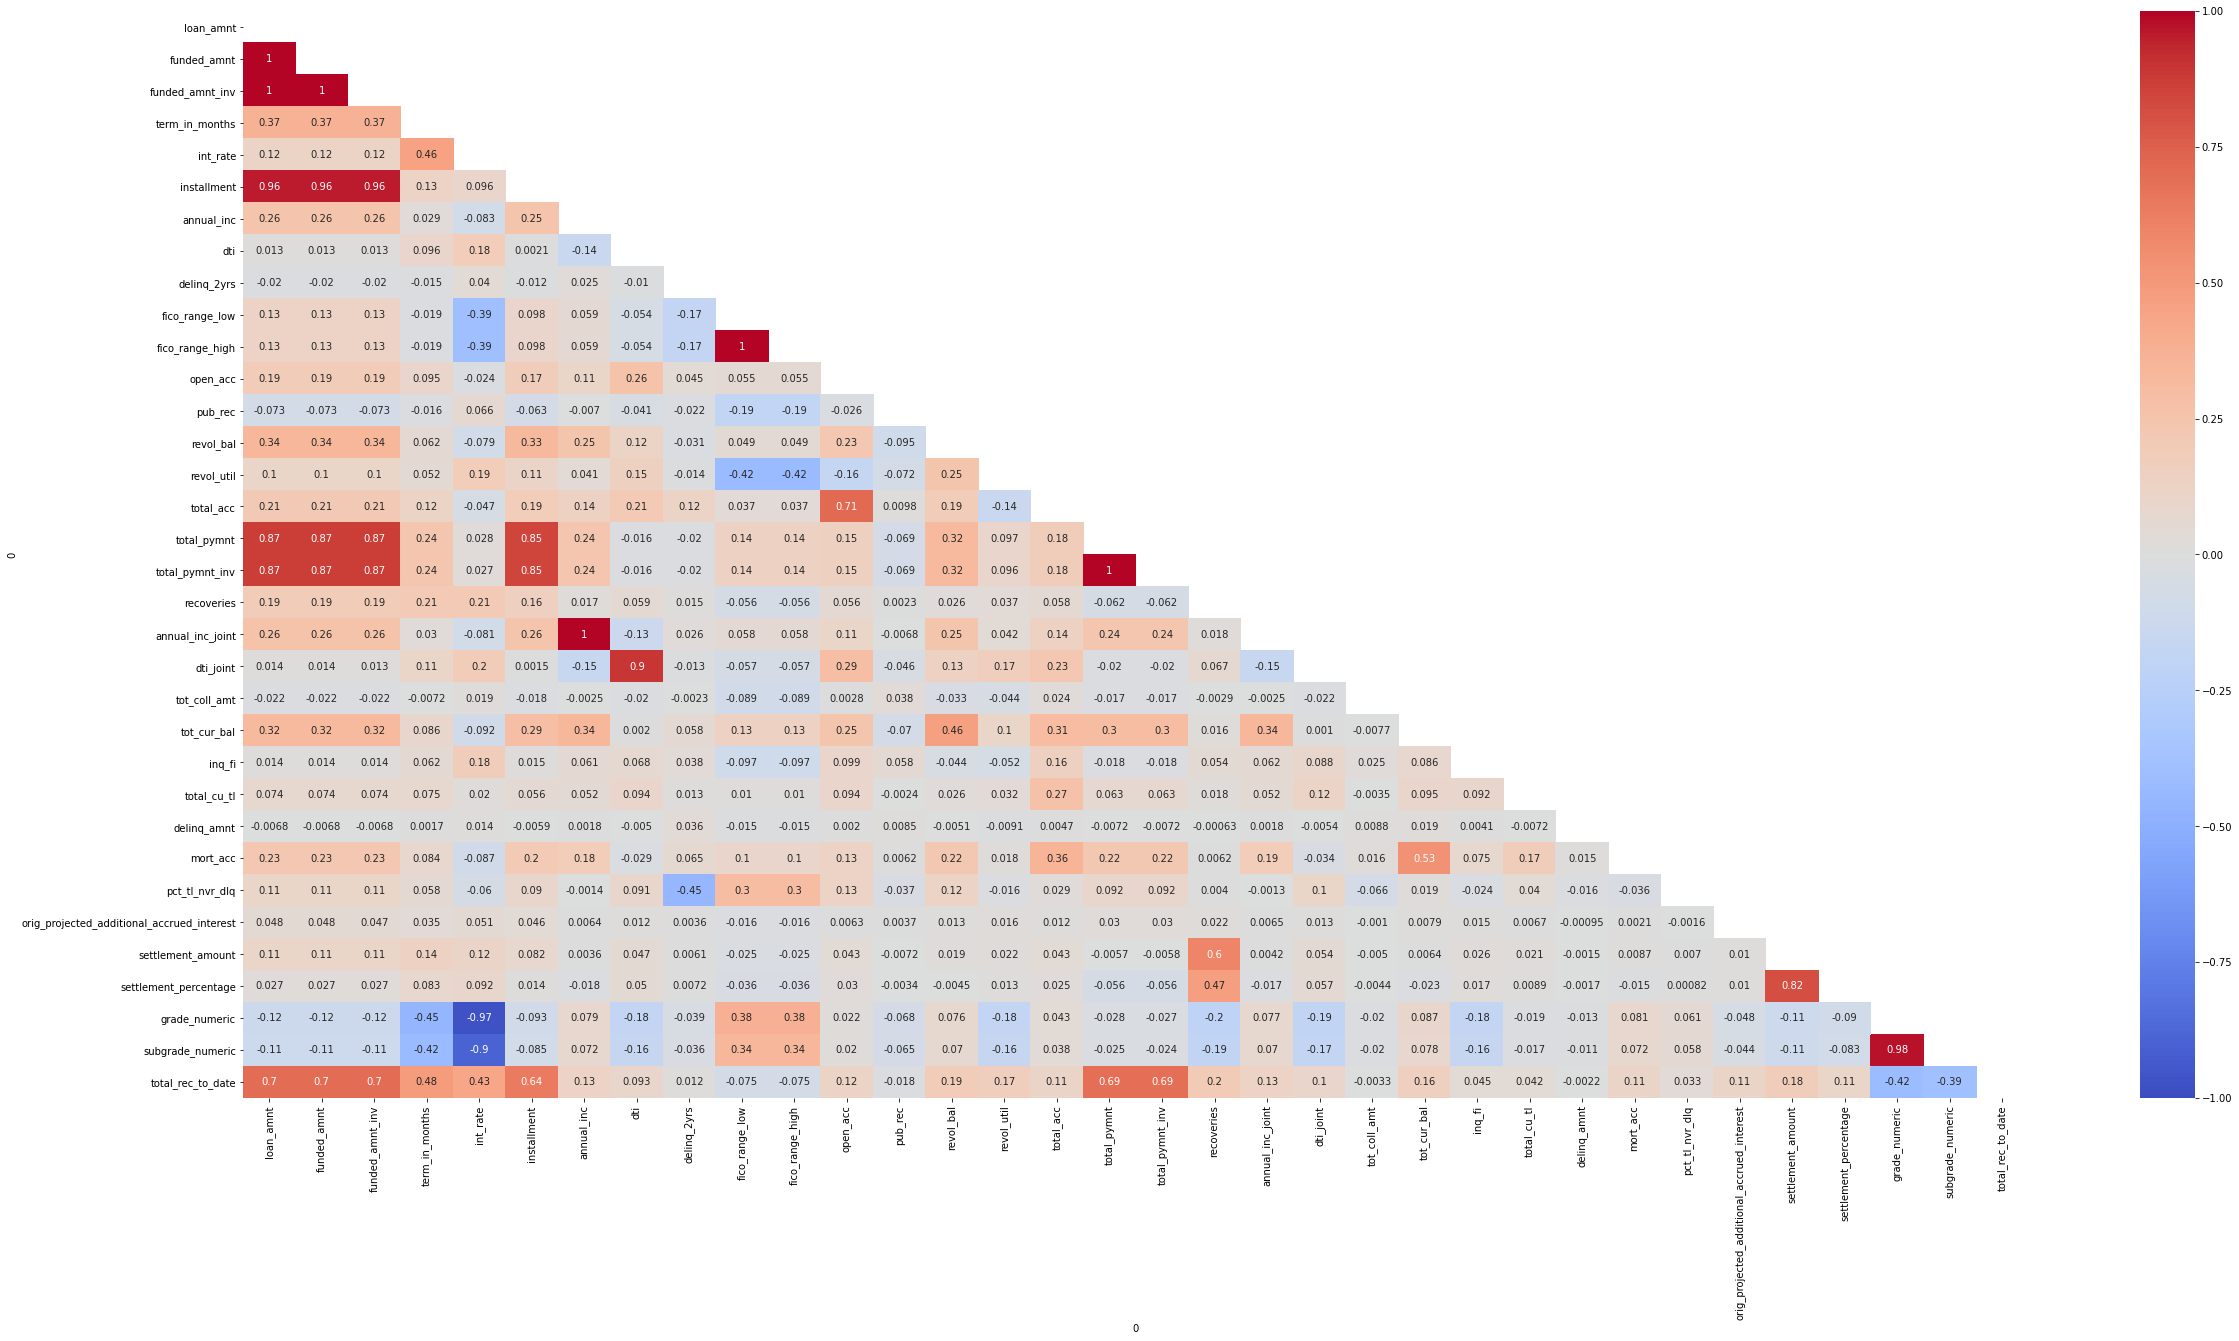

In [ ]:
#create heat map to see how our numeric variables correlate - target variable: total_rec_to_date (money made)
options = ['Fully Paid', 'Charged Off']
completed_df = df[df['loan_status'].isin(options)]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
completed_df_variables = completed_df.select_dtypes(include=numerics)
completed_df_variables = completed_df_variables.drop(['total_rec_int', 'total_rec_late_fee','collection_recovery_fee','total_rec_to_date'], axis=1)
completed_df_variables['total_rec_to_date']=completed_df['total_rec_to_date']
corr = completed_df_variables.corr()
plt.figure(figsize=(40,20))
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask);

In [ ]:
#completed_df_variables.drop(['orig_projected_additional_accrued_interest'], axis=1, inplace=True)
#inq_fi
#total_cu_tl
#dti
completed_df_variables.drop(['inq_fi'], axis=1, inplace=True)
completed_df_variables.drop(['total_cu_tl'], axis=1, inplace=True)
completed_df_variables.drop(['orig_projected_additional_accrued_interest'], axis=1, inplace=True)

profit = completed_df_variables['total_rec_to_date']

In [ ]:
#scale numeric data from -1-1
def scale_numeric(data, numeric_columns, scaler):
    for col in numeric_columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

# we can now define the scaler we want to use and apply it to our dataset 
scaler = StandardScaler()
completed_df_variables_scaled = scale_numeric(completed_df_variables, completed_df_variables.columns, scaler)
completed_df_variables_scaled.drop(['total_rec_to_date'], axis=1, inplace=True)
#completed_df_variables_scaled.drop(['orig_projected_additional_accrued_interest'], axis=1, inplace=True)
#drop new columns with NaN values before regression
completed_df_variables_scaled.isnull().sum()
#completed_df_variables_scaled.head()

0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term_in_months           0
int_rate                 0
installment              0
annual_inc               0
dti                      0
delinq_2yrs              0
fico_range_low           0
fico_range_high          0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               0
total_acc                0
total_pymnt              0
total_pymnt_inv          0
recoveries               0
annual_inc_joint         0
dti_joint                0
tot_coll_amt             0
tot_cur_bal              0
delinq_amnt              0
mort_acc                 0
pct_tl_nvr_dlq           0
settlement_amount        0
settlement_percentage    0
grade_numeric            0
subgrade_numeric         0
dtype: int64

In [ ]:
#split into train and test sets. target variable (Y) = profit or 'total_rec_to_date' column
X_train, X_test, y_train, y_test = model_selection.train_test_split(completed_df_variables_scaled, profit, test_size = 0.2, random_state = 5)

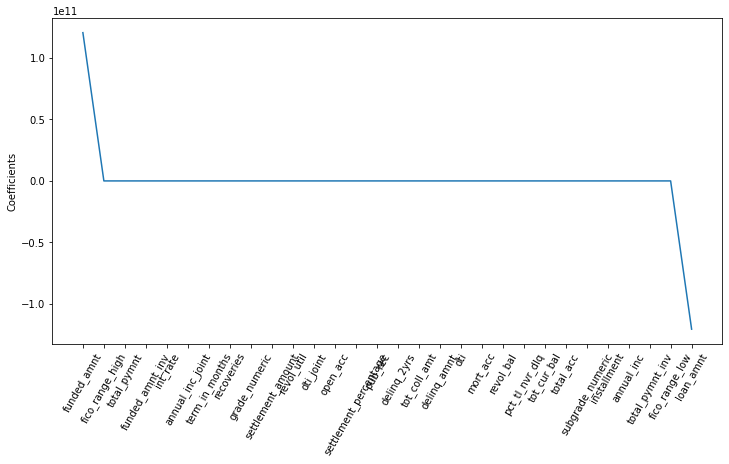

In [ ]:
# In scikit-learn you create a model separate from your data, which allows you to swap in other models with minimal code changes
lm = LinearRegression()

# fitting the model to the data means to train our model on the data
# the fit function takes both the X and y variables of the training data 
lm.fit(X_train, y_train)

# let's save the coeffiencents and plot them large to small
linear1_coeff = lm.coef_.copy()
coeff_perm = np.flipud(np.argsort(linear1_coeff))

plt.figure(figsize=(12,6))
plt.plot(linear1_coeff[coeff_perm])
plt.ylabel('Coefficients')
plt.xticks(range(completed_df_variables_scaled.columns.size), completed_df_variables_scaled.columns.values[coeff_perm], rotation=60)
plt.show()

In [ ]:
y_pred = lm.predict(X_test)

Mean squared error:  0.3017379177841678
Mean absolute error:  0.3383834913707195
R^2 :  0.6984577270464065
0.3383834913707195


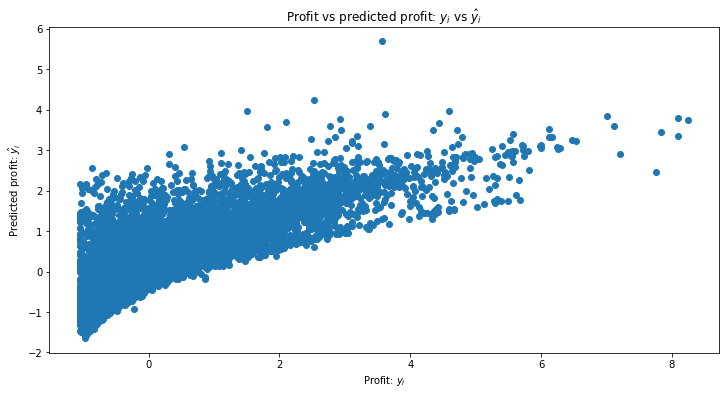

In [ ]:
def evaluate(y_test, y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(y_test, y_pred)
    msa = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.figure(figsize=(12,6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Profit: $y_i$")
    plt.ylabel("Predicted profit: $\hat{y}_i$")
    plt.title("Profit vs predicted profit: $y_i$ vs $\hat{y}_i$")

evaluate(y_test, y_pred)

# we can explore how metrics are dervied in a little more detail by looking at MAE
# here we will implement MAE using numpy, building it up step by step

# with MAE, we get the absolute values of the error - as you can see this is of the difference between the actual and predicted values
np.abs(y_test - y_pred)

# we will then sum them up 
np.sum(np.abs(y_test - y_pred))

# then divide by the total number of predictions/actual values
# as you will see, we get to the same score implemented above 
print (np.sum(np.abs(y_test - y_pred))/len(y_test))

In [ ]:
# Let's cross-validate our basic linear model
from sklearn.model_selection import cross_val_score
# define model
cvlm = LinearRegression()
# run 5-fold cross-validation
cv_results = cross_val_score(cvlm, X_train, y_train, cv=10)
print(cv_results)
# find average performance
np.mean(cv_results)

[0.69256658 0.70696108 0.69027791 0.69476164 0.69008674 0.69123453
 0.71515228 0.70525103 0.68231886 0.70735108]


0.6975961733185254

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


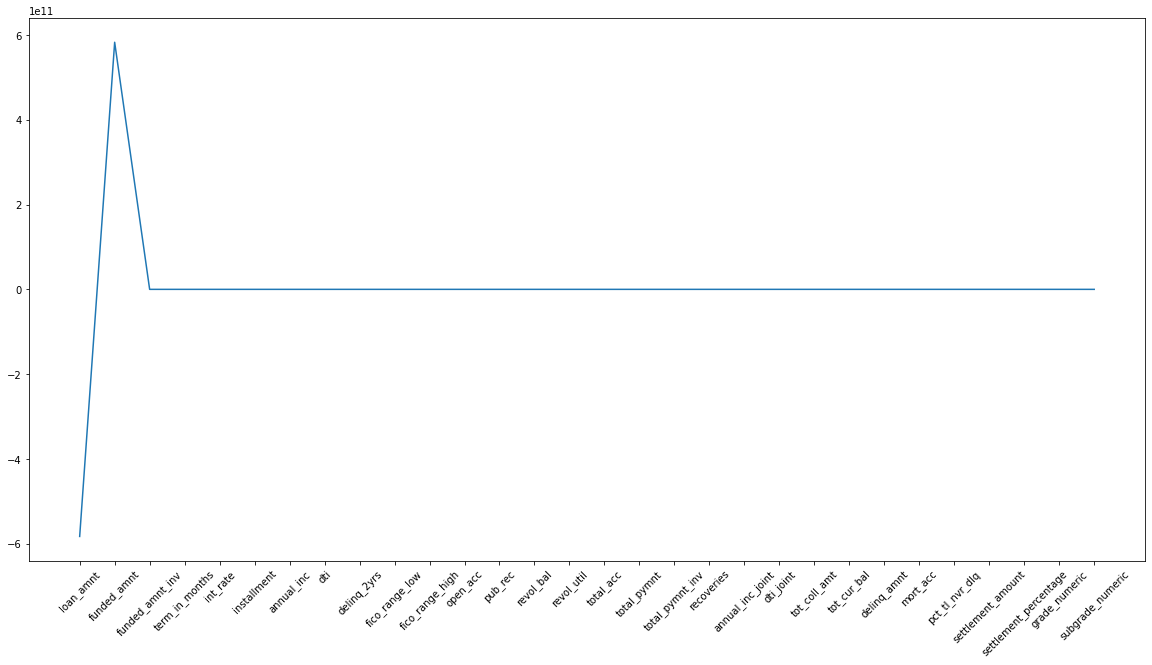

In [ ]:
#Perform Ridge Regression as well

#Tested different alpha values to find best performing one
ridge = Ridge(alpha=0)#, normalize=True)
ridge.fit(X_train, y_train)
print(ridge)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)
#Ridge score is .6984 compared to Linear's .697
plt.figure(figsize=(20, 10))
plt.plot(completed_df_variables_scaled.columns, ridge.coef_)
plt.xticks(rotation=45)
plt.show()

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


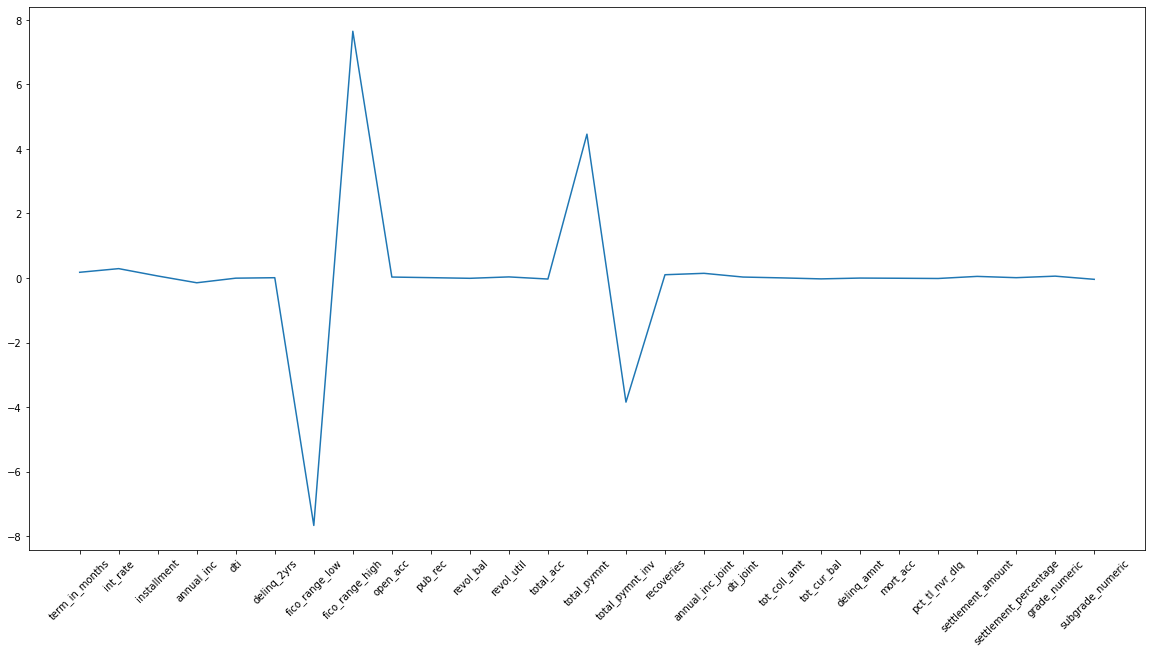

In [ ]:
#we see that loan amount is the main determinant of money made - let's see if other variables step up when we get rid of that
completed_df_variables_noamt = completed_df_variables.copy()
completed_df_variables_noamt.drop(['loan_amnt'], axis=1, inplace=True)
completed_df_variables_noamt.drop(['funded_amnt'], axis=1, inplace=True)
completed_df_variables_noamt.drop(['funded_amnt_inv'], axis=1, inplace=True)

#split new df into train/test

X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(completed_df_variables_noamt, profit, test_size = 0.2, random_state = 5)
#perform ridge regression again


ridge2 = Ridge(alpha=0)#, normalize=True)
ridge2.fit(X_train2, y_train2)
print(ridge2)
ridge2_pred = ridge2.predict(X_test2)
ridge2.score(X_test2, y_test2)
#Ridge score is .6984 compared to Linear's .697
plt.figure(figsize=(20, 10))
plt.plot(completed_df_variables_noamt.columns, ridge2.coef_)
plt.xticks(rotation=45)
plt.show()

#observe which variables have the largest positive and negative correlation with profit !!$!$!$$$$!$